### Base Learner 7d  - UN-Freeze and fit_one_cyle

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path,
            '_learn_norm': False,
            }
default_params.update(my_params)

In [3]:
set_seed(42)

In [4]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True,)

In [5]:
learn.unfreeze()

In [6]:
set_seed(42)
# with learn.no_logging(): learn.fit_one_cycle(10)
# learn.fit_one_cycle(3, lr_max=slice(1e-6,1e-4))
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,1.233588,3.303471,0.738676,0.911150,0.787456,00:14
1,1.060164,0.366324,0.843206,1.000000,0.844948,00:14
2,0.606635,0.039399,0.982578,0.986063,0.996516,00:14
3,0.306488,0.004740,1.000000,1.000000,1.000000,00:14
4,0.191866,0.001142,1.000000,1.000000,1.000000,00:14


##### Interp

In [35]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,9.005042,0.144737,0.596491,0.328947
1,1.825926,0.526316,0.929825,0.570175
2,1.203350,0.609649,0.864035,0.710526


##### 2nd Round of fitting

In [7]:
learn.freeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.360013,0.009691,0.996516,1.000000,0.996516,00:14
1,0.309639,0.004455,0.998258,1.000000,0.998258,00:14
2,0.298173,0.002321,1.000000,1.000000,1.000000,00:14
3,0.261276,0.001952,1.000000,1.000000,1.000000,00:14
4,0.222624,0.000786,1.000000,1.000000,1.000000,00:14
5,0.172222,0.000794,1.000000,1.000000,1.000000,00:14
6,0.179788,0.000685,1.000000,1.000000,1.000000,00:14
7,0.174155,0.000864,1.000000,1.000000,1.000000,00:14
8,0.164115,0.000492,1.000000,1.000000,1.000000,00:14
9,0.149645,0.000355,1.000000,1.000000,1.000000,00:14


In [8]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.678854,0.535088,0.916667,0.592105
1,1.241989,0.657895,0.934211,0.719298
2,1.190750,0.657895,0.947368,0.706140
3,1.131190,0.684211,0.951754,0.728070
4,1.097652,0.692982,0.938596,0.745614
5,1.063653,0.714912,0.951754,0.750000
6,1.047578,0.701754,0.942982,0.741228
7,0.982345,0.723684,0.951754,0.771930
8,1.009260,0.706140,0.947368,0.763158
9,0.974960,0.706140,0.942982,0.741228


##### misc

In [8]:
learn.cbs.pop(3)

TestSetRecorder

              precision    recall  f1-score   support

black-bishop       0.90      0.64      0.75        14
  black-king       0.73      0.73      0.73        11
black-knight       0.86      1.00      0.92        12
  black-pawn       0.87      0.81      0.84        16
 black-queen       0.83      0.77      0.80        13
  black-rook       0.80      1.00      0.89        12
white-bishop       1.00      0.75      0.86        12
  white-king       0.92      0.86      0.89        14
white-knight       0.71      1.00      0.83        15
  white-pawn       0.83      1.00      0.91        15
 white-queen       0.92      0.86      0.89        14
  white-rook       0.91      0.71      0.80        14

    accuracy                           0.85       162
   macro avg       0.86      0.84      0.84       162
weighted avg       0.86      0.85      0.84       162



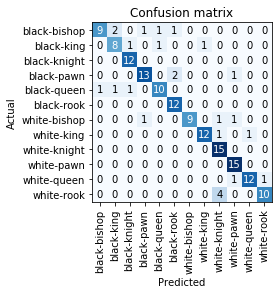

In [9]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

interp.plot_confusion_matrix()

##### Save

In [10]:
old_path = learn.path
learn.path = Path('../models')
learn.export('base-learner7-fit10-2.pkl')
learn.path = old_path

In [11]:
old_path

Path('../../../rf-chess-data/cropped_v1.1')